In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F          # Adds some efficiency
from torch.utils.data import DataLoader  # lets us load data in batches
from torchvision import transforms
from torchvision.datasets import ImageFolder
from PIL import Image

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix  # Pour évaluer les résultats
import matplotlib.pyplot as plt

import seaborn as sn  # for heatmaps

#Load the data
#from google.colab import drive
#drive.mount('/content/drive')


In [2]:
###########################
# Look Test Data
###########################

df = pd.read_csv('./panneaux_route/Test.csv',header= 0)
df.head(15)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
5,52,56,5,5,47,51,38,Test/00005.png
6,147,130,12,12,135,119,18,Test/00006.png
7,32,33,5,5,26,28,12,Test/00007.png
8,45,50,6,5,40,45,25,Test/00008.png
9,81,86,7,7,74,79,35,Test/00009.png


In [3]:
##############################
# Generate Test Data
##############################
import re
import glob 
import os
import shutil

taille = len(df['Path'])
mycolumns = ['ClassId','Path']
liste = []
tupl = ()
for i in range(taille):
        p = df['Path'][i]
        c = df['ClassId'][i]
        p = re.sub('.*\/', '', p)
        tupl = (int(c),p)
        liste.append(tupl)

for filepath in glob.iglob('./panneaux_route/Test/*.png'):
        filepath = re.sub('.*\/', '', filepath)
        for x in liste:         
                if filepath in x:
                        if not os.path.exists(f'./panneaux_route/Test/{str(x[0])}'):
                                path = os.path.join('./panneaux_route/Test/',str(x[0]))
                                os.mkdir(path)
                        shutil.move(f'./panneaux_route/Test/{x[1]}',f'./panneaux_route/Test/{str(x[0])}')

In [4]:
##############################
# Generate Train Data
##############################
train_transform= transforms.Compose([   # Copose permet de faire une liste de transformation
                                transforms.Resize((32, 32)), # Redimensionnement de l'image pour qu'elles est tous la même dimension
                                #transforms.CenterCrop(22),
                                #transforms.RandomHorizontalFlip(p=0.2),  # Normally we'd set p=0.5    on inverse les images horizontalement au hasard ici 20% de nos données
                                #transforms.RandomRotation(30),  # Rotate randomly between +/- 30 degrees
                                transforms.ToTensor(),   # Transformer les images en Tensor
                                transforms.Normalize((0.3337, 0.3064, 0.3171), ( 0.2672, 0.2564, 0.2629))
                               ])



train_data = ImageFolder('./panneaux_route/Train',transform=train_transform)

print(train_data)
print('All classes of our Data"Images" :\n',train_data.class_to_idx)

Dataset ImageFolder
    Number of datapoints: 39209
    Root location: ./panneaux_route/Train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.3337, 0.3064, 0.3171), std=(0.2672, 0.2564, 0.2629))
           )
All classes of our Data"Images" :
 {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '5': 38, '6': 39, '7': 40, '8': 41, '9': 42}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


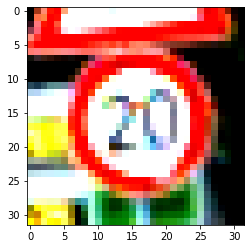

In [5]:
test_image = train_data[9][0]
plt.imshow(np.transpose(test_image.numpy(), (1, 2, 0)));

In [6]:
test_transform= transforms.Compose([   # Copose permet de faire une liste de transformation
                                transforms.Resize((32, 32)), # Redimensionnement de l'image pour qu'elles est tous la même dimension
                                transforms.ToTensor(),   # Transformer les images en Tensor
                                transforms.Normalize((0.3337, 0.3064, 0.3171), ( 0.2672, 0.2564, 0.2629))
                               ])
                               
test_data = ImageFolder('./panneaux_route/Test',transform=test_transform)

print(test_data)
print('All classes of our Data"Images" :\n',test_data.class_to_idx)

Dataset ImageFolder
    Number of datapoints: 12630
    Root location: ./panneaux_route/Test
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.3337, 0.3064, 0.3171), std=(0.2672, 0.2564, 0.2629))
           )
All classes of our Data"Images" :
 {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '5': 38, '6': 39, '7': 40, '8': 41, '9': 42}


In [7]:
#####################################
# Examine a training record #
#####################################
train_data[0]

(tensor([[[-0.1481, -0.1628, -0.0307,  ..., -0.2655, -0.2949, -0.2802],
          [-0.0454, -0.0894,  0.0427,  ..., -0.1775, -0.1335, -0.0894],
          [-0.0894, -0.0160,  0.0867,  ..., -0.1922, -0.1628, -0.1041],
          ...,
          [ 0.6004,  0.4976,  0.3362,  ...,  0.1747,  0.2041,  0.2041],
          [ 0.0720,  0.0867, -0.1188,  ...,  0.2922,  0.3215,  0.1454],
          [-0.0014,  0.1307, -0.2362,  ...,  0.2335,  0.1894,  0.0720]],
 
         [[-0.0020, -0.0326,  0.0897,  ..., -0.0632, -0.1397, -0.1703],
          [ 0.0745,  0.0439,  0.1356,  ..., -0.0173, -0.0173,  0.0133],
          [ 0.0133,  0.0897,  0.1662,  ..., -0.0632, -0.0479, -0.0020],
          ...,
          [ 0.7627,  0.6862,  0.5945,  ...,  0.2733,  0.3498,  0.3803],
          [ 0.2427,  0.3039,  0.1356,  ...,  0.3956,  0.5027,  0.3803],
          [ 0.0897,  0.3192,  0.0286,  ...,  0.3651,  0.3498,  0.2886]],
 
         [[-0.0128, -0.0427,  0.0319,  ..., -0.1173, -0.1918, -0.2217],
          [ 0.0617,  0.0319,

In [8]:
image, label = train_data[3072]
print('Shape:', image.shape, '\nLabel:', label)

Shape: torch.Size([3, 32, 32]) 
Label: 2


In [9]:
#Paths des images avec les labels qui correspondent
#print(train_data.imgs)

In [10]:
#####################################
# Batch Loading with DataLoader #
#####################################

train_loader = DataLoader(
    train_data,
    batch_size=128, # Nombre d'enregistrement à traiter à la fois
    shuffle=True    # Le Datset sera mélanger après chaque epochs
)

test_loader = DataLoader(
    test_data, 
    batch_size=128,
    shuffle=True
)

In [11]:
def show_history(history):
    figure, axis = plt.subplots(1, 2)
    axis[0].plot([d["epoch"] for d in history], [d["loss"] for d in history])
    axis[0].set_title("Loss per epoch")

    axis[1].plot([d["epoch"] for d in history], [d["train_acc"] for d in history], label="train")
    axis[1].plot([d["epoch"] for d in history], [d["val_acc"] for d in history], label="validation")
    axis[1].set_title("Accuracy per epoch")

    plt.legend()
    plt.show()

In [12]:
classes_names = [ "Limitation de vitesse (20km/h)","Limitation de vitesse (30km/h)", "Limitation de vitesse (50km/h)", "Limitation de vitesse (60km/h)", "Limitation de vitesse (70km/h)", "Limitation de vitesse (80km/h)", 
"Fin de limitation de vitesse (80km/h)", "Limitation de vitesse (100km/h)", 
    "Limitation de vitesse (120km/h)", 
    "Interdiction de depasser", 
    "Interdiction de depasser pour vehicules > 3.5t", 
    "Intersection ou' vous etes prioritaire", 
    "Route prioritaire", 
    "Ceder le passage", 
    "Arret a' l'intersection", 
    "Circulation interdite", 
    "Acces interdit aux vehicules > 3.5t", 
    "Sens interdit", 
    "Danger", 
    "Virage a' gauche", 
    "Virage a' droite", 
    "Succession de virages", 
    "Cassis ou dos-d'ane", 
    "Chaussee glissante", 
    "Chaussee retrecie par la droite", 
    "Travaux en cours", 
    "Annonce feux", 
    "Passage pietons", 
    "Endroit frequente' par les enfants", 
    "Debouche' de cyclistes", 
    "Neige ou glace",
    "Passage d'animaux sauvages", 
    "Fin des interdictions precedemment signalees", 
    "Direction obligatoire a' la prochaine intersection : a' droite", 
    "Direction obligatoire a' la prochaine intersection : a' gauche", 
    "Direction obligatoire a' la prochaine intersection : tout droit", 
    "Direction obligatoire a' la prochaine intersection : tout droit ou a' droite", 
    "Direction obligatoire a' la prochaine intersection : tout droit ou a' gauche", 
    "Contournement obligatoire de l'obstacle par la droite", 
    "Contournement obligatoire de l'obstacle par la gauche", 
    "Carrefour giratoire", 
    "Fin d'interdiction de depasser", 
    "Fin d'interdiction de depasser pour vehicules > 3.5t" 
]

In [13]:
# On Prend le premier lot d'images
for images,labels in train_loader: 
    break

images[0].shape

torch.Size([3, 32, 32])

In [14]:
# Après la phase du pooling 
(32-2) # car en pert les bordures après la première convolution
(32-2)/2 # car on fait du pooling 2 by 2
((32-2)/2)-2 # car on a fait une deuxième convolution
(((32-2)/2)-2)/2 # car on  a fait un deuxième pooling 2*2

#On aura 6.5 pixel par coté 
#Se qui va réellement être prisen compte c'est la valeur 6

6.5

In [15]:
####################
# Define the model #
####################

def validate(predictions, labels):
    nb_errors = ((predictions.argmax(1)) != labels).sum()
    return (len(predictions)-nb_errors).item()

#Remarque: Plus on a de filter plus le temps de calcul augmente
   
class ConvolutionalNetwork(nn.Module):
  
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1)  # c3: for RGB     6: number filter   5: size of filter5*5     1: stride 
        self.conv2 = nn.Conv2d(16, 32, 3, 1) # 6 filtres de la couche précédente  16: valeur arbitraire
        self.fc1 = nn.Linear(6*6*32, 120)   # changed from (4*4*16) to fit 32x32 images with 3x3 filters
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 43)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2) # Pooling 2*2 et une strade de 2
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 6*6*32)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)  #On utilise soft max car c'est une classification multiclass, on réduit la dimension à 1

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [17]:
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1152, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=43, bias=True)
)

In [18]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

count_parameters(model)
# 138240 toutes les connexion de 1152 à 120
# 120    les biais
# 10080  toutes les connexion de 120 à 84
# 84     les biais
# 3612   toutes les connexion de 84 à 43 output noeurones

# On a donc 157267 paramètres en tout
# (Remarque : Même en utilisant la convolution et le pooling le nombre de paramètre de notre réseaau restent conséquent)

   432
    16
  4608
    32
138240
   120
 10080
    84
  3612
    43
______
157267


In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#Avant d'entraîner le modèle, il faut savoir comment on va flatting (aplatir) nos données

print('La shape actuelle des images est: ',images.shape)
print("Pour 100 images seront aplati à 3*32*32 pixels = 3072")

La shape actuelle des images est:  torch.Size([128, 3, 32, 32])
Pour 100 images seront aplati à 3*32*32 pixels = 3072


In [20]:
from functools import reduce 
# check the number of parameters of the net 
total_nb_par = 0
for p in model.parameters():
    print(p.shape)
    total_nb_par += reduce(lambda x, y: x*y, p.shape, 1)
print("total nb parameters: ", total_nb_par)

# fix a notion of accuracy for this model,
def validate(predictions, labels):
    nb_errors = ((predictions.argmax(1)) != labels).sum()
    return (len(predictions)-nb_errors).item()

torch.Size([16, 3, 3, 3])
torch.Size([16])
torch.Size([32, 16, 3, 3])
torch.Size([32])
torch.Size([120, 1152])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([43, 84])
torch.Size([43])
total nb parameters:  157267


In [21]:
########################################################
## FIX A TRAINING ALGORITHM (MINI-BATCH GD WITH ADAM) ##
########################################################

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_loop(
    train_loader, 
    validation_loader,  # for monitoring overfitting
    model, 
    loss_map, 
    validation_map,     # for monitoring overfitting
    lr=1e-3, 
    epochs=20,
    weight_decay=0.0):  # a regularisation parameter, discussed later
    # use gpu if available    
    print(device)
    model.to(device)
    # create optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)    # weight_decay, discussed later

    # Train model    
    history = [] # to monitor learning: list of  {epoch: int, loss: float, train_acc:float, val_acc:float}
    for epoch in range(epochs):
        loss_epoch = 0.
        train_acc = 0.
        val_acc = 0.
        model.train()   # for dropout and batch normalisation, discussed later
        for images, labels in train_loader:
            # Transfers data to GPU
            images, labels = images.to(device), labels.to(device)
            # Primal computation
            output = model(images)            
            loss = loss_map(output, labels)            
            # Gradient computation
            model.zero_grad()
            loss.backward()
            # perform parameter update based on current gradients
            optimizer.step()
            # compute the epoch training loss
            loss_epoch += loss.item()
            train_acc += validation_map(output, labels)
        # compute validation accuracy
        model.eval()    # for dropout and batch normalisation, discussed later
        with torch.no_grad():
            for images, labels in validation_loader:
                # Transfers data to GPU
                images, labels = images.to(device), labels.to(device)
                val_acc += validation_map(model(images), labels)
            train_acc = 100*train_acc/len(train_loader.dataset)
            val_acc = 100*val_acc/len(validation_loader.dataset)
        history.append({"epoch" : epoch, "loss" : loss_epoch, "train_acc" : train_acc, "val_acc" : val_acc})
        
        print(f"epoch : {epoch + 1}/{epochs}, loss = {loss_epoch:.6f}, train_acc = {train_acc:.2f}, val_acc = {val_acc:.2f}")
    return history


def show_history(history):
    figure, axis = plt.subplots(1, 2)
    axis[0].plot([d["epoch"] for d in history], [d["loss"] for d in history])
    axis[0].set_title("Loss per epoch")

    axis[1].plot([d["epoch"] for d in history], [d["train_acc"] for d in history], label="train")
    axis[1].plot([d["epoch"] for d in history], [d["val_acc"] for d in history], label="validation")
    axis[1].set_title("Accuracy per epoch")

    plt.legend()
    plt.show()

Full data Version1
cpu
epoch : 1/30, loss = 488.633520, train_acc = 54.65, val_acc = 71.23
epoch : 2/30, loss = 104.013614, train_acc = 90.24, val_acc = 86.77
epoch : 3/30, loss = 49.707045, train_acc = 95.71, val_acc = 88.64
epoch : 4/30, loss = 30.589001, train_acc = 97.49, val_acc = 89.68
epoch : 5/30, loss = 21.830247, train_acc = 98.23, val_acc = 91.14
epoch : 6/30, loss = 15.518154, train_acc = 98.71, val_acc = 91.12
epoch : 7/30, loss = 12.550208, train_acc = 98.92, val_acc = 92.48
epoch : 8/30, loss = 12.643125, train_acc = 98.87, val_acc = 92.82
epoch : 9/30, loss = 9.260168, train_acc = 99.19, val_acc = 91.68
epoch : 10/30, loss = 7.628214, train_acc = 99.32, val_acc = 92.36
epoch : 11/30, loss = 7.354060, train_acc = 99.29, val_acc = 92.69
epoch : 12/30, loss = 3.720191, train_acc = 99.67, val_acc = 92.91
epoch : 13/30, loss = 6.073241, train_acc = 99.42, val_acc = 90.72
epoch : 14/30, loss = 4.635571, train_acc = 99.58, val_acc = 93.06
epoch : 15/30, loss = 5.749075, train_

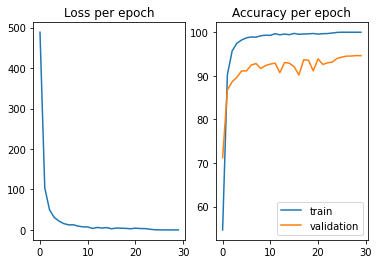

In [22]:
#####################
## Train Version 1 ##
#####################

# Let us net learn on the whole training data-set
print("Full data Version1")
history = train_loop(
    train_loader=train_loader, 
    validation_loader=test_loader,
    model=model, 
    loss_map=nn.CrossEntropyLoss(),
    validation_map=validate,
    lr=0.001,
    epochs=30)

show_history(history)

In [23]:
test_data

Dataset ImageFolder
    Number of datapoints: 12630
    Root location: ./panneaux_route/Test
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.3337, 0.3064, 0.3171), std=(0.2672, 0.2564, 0.2629))
           )

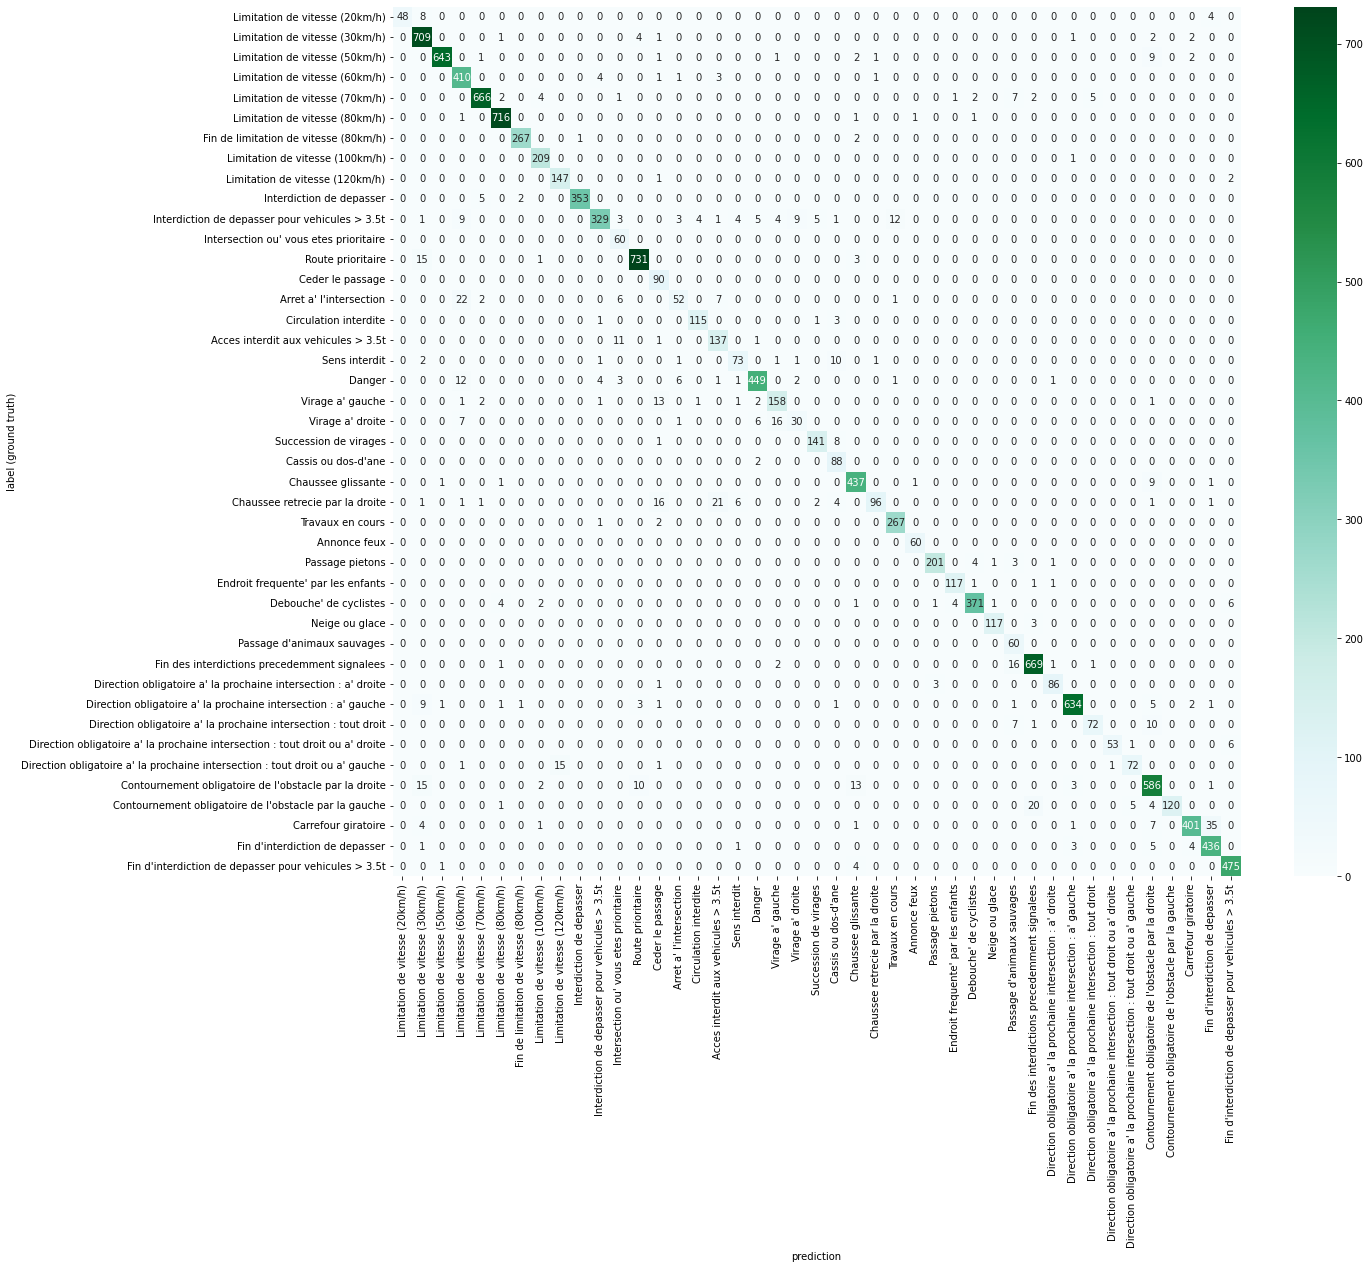

In [24]:
# Create a loader for the entire the test set
test_load_all = DataLoader(test_data, batch_size=12630, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

arr = confusion_matrix(y_test.view(-1), predicted.view(-1))
df_cm = pd.DataFrame(arr, classes_names, classes_names)
plt.figure(figsize = (19,16))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();

In [25]:
torch.save(model.state_dict(), 'MyModelVersion1.pt')

In [26]:
class ConvolutionalNetwork4(nn.Module):
    def __init__(self,dropout_p=0.5):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 120, 5)
        self.conv1_bn = nn.BatchNorm2d(120)
        self.pool = nn.MaxPool2d(2, 2)  
        self.conv2 = nn.Conv2d(120, 160, 3)
        self.conv2_bn = nn.BatchNorm2d(160) 
        self.conv3 = nn.Conv2d(160, 250, 1)
        self.conv3_bn = nn.BatchNorm2d(250)  
        self.fc1 = nn.Linear(250 * 3 * 3, 360)
        self.fc1_bn = nn.BatchNorm1d(360)
        self.dropout = nn.Dropout(dropout_p)
        self.fc2 = nn.Linear(360, 120)
        self.fc3 = nn.Linear(120, 84)
        self.fc4 = nn.Linear(84, 43)

    def forward(self, input):
       
        layer1 = self.pool(F.elu(self.conv1(input)))
        layer_d = self.dropout(self.conv1_bn(layer1))
        layer2 = self.pool(F.elu(self.conv2(layer_d)))
        layer2_d = self.dropout(self.conv2_bn(layer2))         
        layer3 = self.pool(F.elu(self.conv3(layer2_d)))
        layer3_d = self.dropout(self.conv3_bn(layer3))
        layer4 = layer3_d.view(-1, 250 * 3 * 3)
        layer5 = F.elu(self.fc1(layer4))  
        layer6 = self.dropout(self.fc1_bn(layer5))
        layer7 = F.elu(self.fc2(layer6))
        layer8 = F.elu(self.fc3(layer7))
        
        output = self.fc4(layer8)
       
        return  F.log_softmax(output, dim=1)

In [27]:
CNNmodel = ConvolutionalNetwork4()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)
CNNmodel

ConvolutionalNetwork4(
  (conv1): Conv2d(3, 120, kernel_size=(5, 5), stride=(1, 1))
  (conv1_bn): BatchNorm2d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(120, 160, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(160, 250, kernel_size=(1, 1), stride=(1, 1))
  (conv3_bn): BatchNorm2d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=2250, out_features=360, bias=True)
  (fc1_bn): BatchNorm1d(360, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=360, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=43, bias=True)
)

In [28]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>8}')
    print(f'________\n{sum(params):>8}')

count_parameters(CNNmodel)

    9000
     120
     120
     120
  172800
     160
     160
     160
   40000
     250
     250
     250
  810000
     360
     360
     360
   43200
     120
   10080
      84
    3612
      43
________
 1091609


In [29]:
####################
## Training Final ##
####################

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_loop(
    train_loader, 
    validation_loader,  # for monitoring overfitting
    model, 
    loss_map, 
    validation_map,     # for monitoring overfitting
    lr=1e-3, 
    epochs=20,
    weight_decay=0.0):  # a regularisation parameter, discussed later
    # use gpu if available    
    print(device)
    model.to(device)
    # create optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)    # weight_decay, discussed later

    # Train model    
    history = [] # to monitor learning: list of  {epoch: int, loss: float, train_acc:float, val_acc:float}
    for epoch in range(epochs):
        loss_epoch = 0.
        train_acc = 0.
        val_acc = 0.
        model.train()   # for dropout and batch normalisation, discussed later
        for images, labels in train_loader:
            # Transfers data to GPU
            images, labels = images.to(device), labels.to(device)
            # Primal computation
            output = model(images)            
            loss = loss_map(output, labels)            
            # Gradient computation
            model.zero_grad()
            loss.backward()
            # perform parameter update based on current gradients
            optimizer.step()
            # compute the epoch training loss
            loss_epoch += loss.item()
            train_acc += validation_map(output, labels)
        # compute validation accuracy
        model.eval()    # for dropout and batch normalisation, discussed later
        with torch.no_grad():
            for images, labels in validation_loader:
                # Transfers data to GPU
                images, labels = images.to(device), labels.to(device)
                val_acc += validation_map(model(images), labels)
            train_acc = 100*train_acc/len(train_loader.dataset)
            val_acc = 100*val_acc/len(validation_loader.dataset)
        history.append({"epoch" : epoch, "loss" : loss_epoch, "train_acc" : train_acc, "val_acc" : val_acc})
        #if epoch % 10 == 9 or epoch == 0:
        print(f"epoch : {epoch + 1}/{epochs}, loss = {loss_epoch:.6f}, train_acc = {train_acc:.2f}, val_acc = {val_acc:.2f}")
    return history


def show_history(history):
    figure, axis = plt.subplots(1, 2)
    axis[0].plot([d["epoch"] for d in history], [d["loss"] for d in history])
    axis[0].set_title("Loss per epoch")

    axis[1].plot([d["epoch"] for d in history], [d["train_acc"] for d in history], label="train")
    axis[1].plot([d["epoch"] for d in history], [d["val_acc"] for d in history], label="validation")
    axis[1].set_title("Accuracy per epoch")

    plt.legend()
    plt.show()

Full data Version2
cpu
epoch : 1/50, loss = 383.544522, train_acc = 62.88, val_acc = 85.73
epoch : 2/50, loss = 118.919049, train_acc = 87.69, val_acc = 91.84
epoch : 3/50, loss = 76.792006, train_acc = 92.08, val_acc = 92.64
epoch : 4/50, loss = 62.069460, train_acc = 93.57, val_acc = 94.52
epoch : 5/50, loss = 48.558017, train_acc = 94.77, val_acc = 95.31
epoch : 6/50, loss = 41.133014, train_acc = 95.57, val_acc = 95.39
epoch : 7/50, loss = 37.423426, train_acc = 96.09, val_acc = 96.14
epoch : 8/50, loss = 32.538206, train_acc = 96.65, val_acc = 95.95
epoch : 9/50, loss = 32.594490, train_acc = 96.55, val_acc = 96.40
epoch : 10/50, loss = 29.258125, train_acc = 96.94, val_acc = 96.44
epoch : 11/50, loss = 25.228705, train_acc = 97.32, val_acc = 96.68
epoch : 12/50, loss = 24.373867, train_acc = 97.42, val_acc = 96.88
epoch : 13/50, loss = 24.924009, train_acc = 97.34, val_acc = 96.22
epoch : 14/50, loss = 22.640959, train_acc = 97.68, val_acc = 96.69
epoch : 15/50, loss = 21.470821,

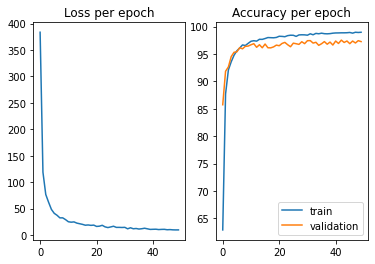

In [30]:
##########################################
## SOME PRE-TEST BEFORE A FULL TRAINING ##
##########################################

# Let us net learn on the whole training data-set
print("Full data Version2")
CNNmodel = CNNmodel
history = train_loop(
    train_loader=train_loader, 
    validation_loader=test_loader,
    model=CNNmodel, 
    loss_map=nn.CrossEntropyLoss(),
    validation_map=validate,
    lr=0.001,
    epochs=50,
   )

show_history(history)

In [31]:
########################
### RESULTS ANALYSIS ###
########################
# model performance on the top N

def validate_top(model, data_loader, device="cpu", top=1):
    model.to(device)
    nb_errors = 0.0
    for images, labels in data_loader:
            # Transfers data to GPU
            images, labels = images.to(device), labels.to(device)
            predictions = model(images)
            _, indices = predictions.sort(1, descending=True)
            test_top = [label not in indices[i, :top] for i,label in enumerate(labels)]
            nb_errors += sum(test_top)
    return nb_errors

for top in [2,3,4,5]:
    nb_errors = validate_top(CNNmodel, test_loader, device="cpu", top=top)            
    print(f"on validation set, accuracy top {top} =", (len(test_loader.dataset)-nb_errors)/len(test_loader.dataset), "nb of errors = ", nb_errors)

on validation set, accuracy top 2 = 0.9877276326207443 nb of errors =  155.0
on validation set, accuracy top 3 = 0.9929532858273951 nb of errors =  89.0
on validation set, accuracy top 4 = 0.9953285827395091 nb of errors =  59.0
on validation set, accuracy top 5 = 0.9961203483768805 nb of errors =  49.0


In [32]:
classes_name = { 
    0:"Limitation de vitesse (20km/h)",
    1:"Limitation de vitesse (30km/h)", 
    2:"Limitation de vitesse (50km/h)", 
    3:"Limitation de vitesse (60km/h)", 
    4:"Limitation de vitesse (70km/h)", 
    5:"Limitation de vitesse (80km/h)", 
    6:"Fin de limitation de vitesse (80km/h)", 
    7:"Limitation de vitesse (100km/h)", 
    8:"Limitation de vitesse (120km/h)", 
    9:"Interdiction de depasser", 
    10:"Interdiction de depasser pour vehicules > 3.5t", 
    11:"Intersection ou' vous etes prioritaire", 
    12:"Route prioritaire", 
    13:"Ceder le passage", 
    14:"Arret a' l'intersection", 
    15:"Circulation interdite", 
    16:"Acces interdit aux vehicules > 3.5t", 
    17:"Sens interdit", 
    18:"Danger", 
    19:"Virage a' gauche", 
    20:"Virage a' droite", 
    21:"Succession de virages", 
    22:"Cassis ou dos-d'ane", 
    23:"Chaussee glissante", 
    24:"Chaussee retrecie par la droite", 
    25:"Travaux en cours", 
    26:"Annonce feux", 
    27:"Passage pietons", 
    28:"Endroit frequente' par les enfants", 
    29:"Debouche' de cyclistes", 
    30:"Neige ou glace",
    31:"Passage d'animaux sauvages", 
    32:"Fin des interdictions precedemment signalees", 
    33:"Direction obligatoire a' la prochaine intersection : a' droite", 
    34:"Direction obligatoire a' la prochaine intersection : a' gauche", 
    35:"Direction obligatoire a' la prochaine intersection : tout droit", 
    36:"Direction obligatoire a' la prochaine intersection : tout droit ou a' droite", 
    37:"Direction obligatoire a' la prochaine intersection : tout droit ou a' gauche", 
    38:"Contournement obligatoire de l'obstacle par la droite", 
    39:"Contournement obligatoire de l'obstacle par la gauche", 
    40:"Carrefour giratoire", 
    41:"Fin d'interdiction de depasser", 
    42:"Fin d'interdiction de depasser pour vehicules > 3.5t" 
}

In [68]:
# model performance by category

def validate_category(model, data_loader, nb_labels, device="cpu"):
    model.to(device)
    nb_corrects = [0]*nb_labels
    nb_samples = [0]*nb_labels
    for images, labels in data_loader:
            # Transfers data to GPU
            images, labels = images.to(device), labels.to(device)
            predictions = model(images)
            for i, label in enumerate(labels):
                nb_corrects[label] += (predictions[i].argmax(0) == label).item()
                nb_samples[label] += 1
    return nb_corrects, nb_samples

nb_correct, nb_simple = validate_category(CNNmodel, test_loader,43,device="cpu")

print("performens on validation dataset :")

for i in range(42):
  idx = test_data.class_to_idx[str(i)]
  print(f"classe :  {i:<10}{classes_names[i]:<30}, accuracy : ",int((nb_correct[idx]/nb_simple[idx])*100),' %')


performens on validation dataset :
classe :  0         Limitation de vitesse (20km/h), accuracy :  100  %
classe :  1         Limitation de vitesse (30km/h), accuracy :  99  %
classe :  2         Limitation de vitesse (50km/h), accuracy :  99  %
classe :  3         Limitation de vitesse (60km/h), accuracy :  96  %
classe :  4         Limitation de vitesse (70km/h), accuracy :  99  %
classe :  5         Limitation de vitesse (80km/h), accuracy :  99  %
classe :  6         Fin de limitation de vitesse (80km/h), accuracy :  88  %
classe :  7         Limitation de vitesse (100km/h), accuracy :  98  %
classe :  8         Limitation de vitesse (120km/h), accuracy :  97  %
classe :  9         Interdiction de depasser      , accuracy :  100  %
classe :  10        Interdiction de depasser pour vehicules > 3.5t, accuracy :  98  %
classe :  11        Intersection ou' vous etes prioritaire, accuracy :  99  %
classe :  12        Route prioritaire             , accuracy :  96  %
classe :  13        

In [34]:
torch.save(CNNmodel.state_dict(), 'MyModelFinal.pt')


In [54]:
print("On remaque que la classe avec de moins de precision possible est la class 20: Virage à droite avec une accuracy = 53,3%" )

On remaque que la classe avec de moins de precision possible est la class 20: Virage à droite avec une accuracy = 53,3%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


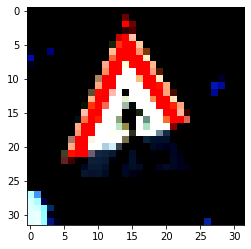

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


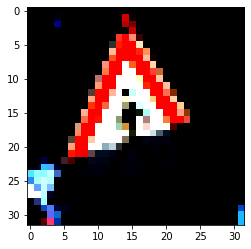

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


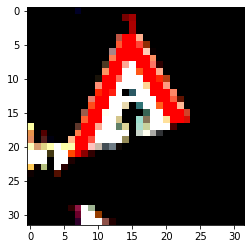

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


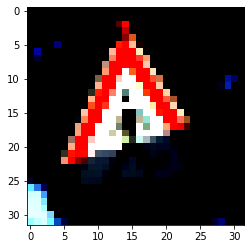

predicted : 11 label : 27


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


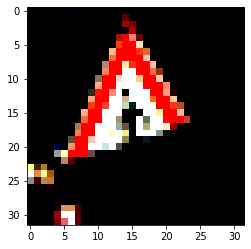

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


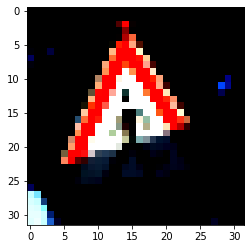

predicted : 11 label : 27


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


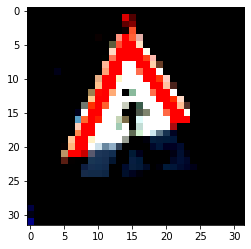

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


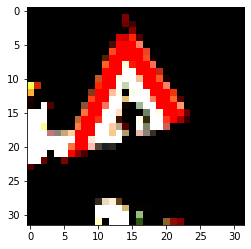

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


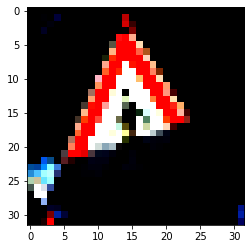

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


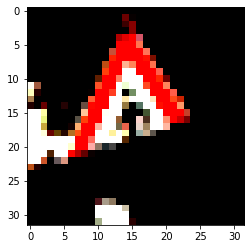

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


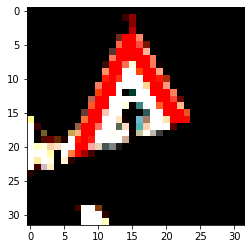

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


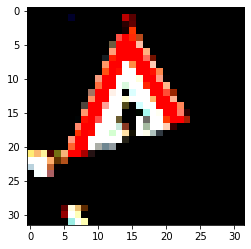

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


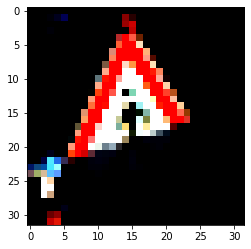

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


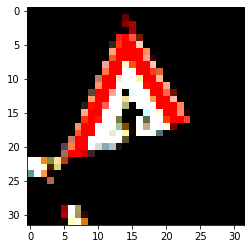

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


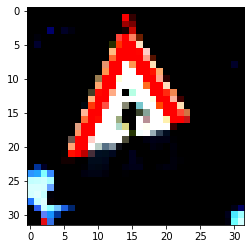

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


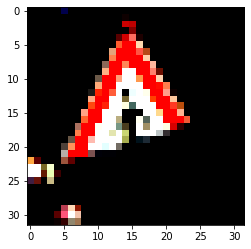

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


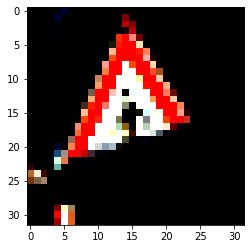

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


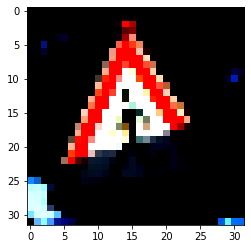

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


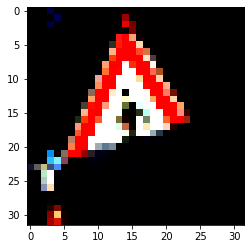

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


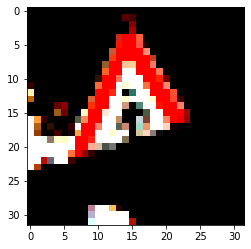

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


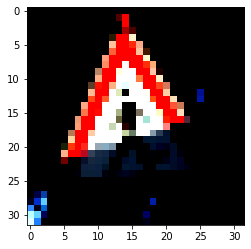

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


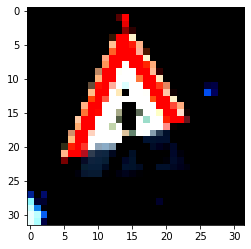

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


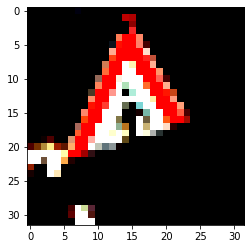

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


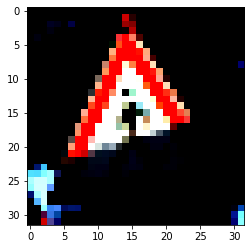

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


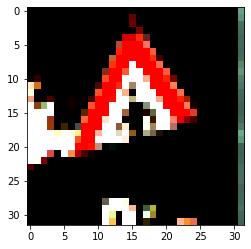

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


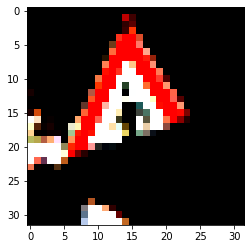

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


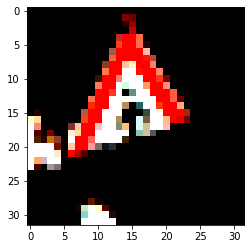

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted : 11 label : 27


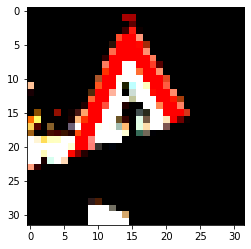

28 Erreur(s) trouvée


In [71]:

Labels = {v: k for k, v in test_data.class_to_idx.items()} # Get labels depuis les index

def nombreErreur(model, test_loader, id, device="cpu"):
    model.to(device)
    cpt = 0
    element = test_data.class_to_idx[str(id)]
    
    for images, labels in test_loader:

            # Transfers data to GPU
            images, labels = images.to(device), labels.to(device)
            predictions = model(images)
            for index, label in enumerate(labels):
                
                if(label == element and predictions[index].argmax(0).item() != label.item()) :
                  print("predicted :", Labels[predictions[index].argmax(0).item()],"label :",Labels[label.item()])
                  
                  plt.imshow(images[index].to("cpu").transpose(0,1).transpose(1,2))
                  plt.show()
                  cpt+=1
    if(cpt == 0):
        print('Aucune erreur trouvée')
    else:
        print(cpt ,"Erreur(s) trouvée")
         
    

nombreErreur(CNNmodel,test_loader,27) 

In [73]:
# Tester les erreur trouvée pour la classes avec 100% d'images bien classifiées
nombreErreur(CNNmodel,test_loader,0) 

Aucune erreur trouvée


In [36]:
test_data.classes

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '5',
 '6',
 '7',
 '8',
 '9']

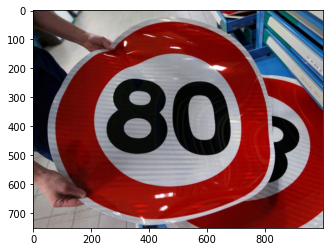

Class :  Limitation de vitesse (80km/h)
Label :  5


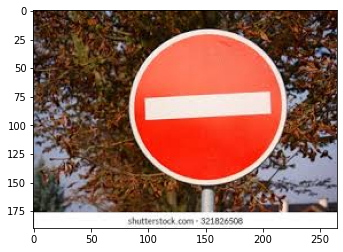

Class :  Sens interdit
Label :  17


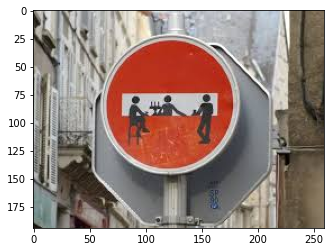

Class :  Sens interdit
Label :  17


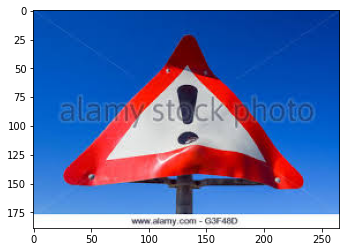

Class :  Danger
Label :  18


In [78]:
CNNmodel_saved = torch.load("MyModelFinal_V1.pt")
#CNNmodel_saved.eval()

def FinalResult(image,model):

  image = Image.open(image)
  plt.imshow(image)
  plt.show()

  Dict = {0: '0', 1: '1', 2: '10', 3: '11', 4: '12', 5: '13', 6: '14', 7: '15', 8: '16', 9: '17', 10: '18', 11: '19', 12: '2', 13: '20', 14: '21', 15: '22', 16: '23', 17: '24', 18: '25', 19: '26', 20: '27', 21: '28', 22: '29', 23: '3', 24: '30', 25: '31', 26: '32', 27: '33', 28: '34', 29: '35', 30: '36', 31: '37', 32: '38', 33: '39', 34: '4', 35: '40', 36: '41', 37: '42', 38: '5', 39: '6', 40: '7', 41: '8', 42: '9'}

  transform_image = transforms.Compose([
        transforms.Resize([32,32]),
        transforms.ToTensor(),
        transforms.Normalize((0.3337, 0.3064, 0.3171), ( 0.2672, 0.2564, 0.2629))
    ])
  
  image = transform_image(image)
  image = image.unsqueeze(0)
  predictions = model(image)

  
  print("Class : ", classes_name[int(Dict[predictions[0].argmax(0).item()])])
  print("Label : ", int(Dict[predictions[0].argmax(0).item()]))

  
FinalResult("./Final_test/80.jpg",CNNmodel)
FinalResult("./Final_test/e.jpeg",CNNmodel)
FinalResult("./Final_test/c.jpeg",CNNmodel)
FinalResult("./Final_test/f.jpeg",CNNmodel)




